<a href="https://colab.research.google.com/github/nidhin-koshy/Notebooks/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM) Classifier

In it's most basic form, SVMs are linear classifiers that try to find the optimum linear separator between classes, such that the margin between the classes is maximized. When combined with the kernel trick, SVMs are a powerful classification technique even for complex class boundaries.

## Linear SVM for separable data
The maximum linear marginizer problem can be cast as:
\begin{align}
\min_{w,b} &\frac{1}{2} \Vert w \Vert^2\\
s.t.\quad y_i (w^Tx_i+b) & \ge 1 \quad \forall i
\end{align}

The above formulation is known as the primal formulation of the SVM classifier.

The above formulation is sensitive to non-linearly separable classes and outliers. An alternative formulation that is robust to outliers and non-separable classes, and which allows a relaxation on the hard constraint for each sample point is:
\begin{align}
\min_{w,b} \frac{1}{2}\Vert w \Vert^2 &+ C\sum_{i=1}^n \xi_{i}\\
s.t.\quad y_i (w^Tx_i+b) & \ge 1-\xi_{i} \quad \forall i \\
\xi_{i} &\ge 0,
\end{align}
where $C$ is a tunable parameter that controls the tradeoff between large margins vs most points being classified correctly. A large value of $C$ ensures that most points are classified correctly but makes the model susceptible to outliers, while a smaller value of $C$ allows some misclassification, but provides a larger margin and probably better generalization. The loss function given above for the relaxed case is also known as "hinge" loss.

## Dual formulation

Most SVM classifiers solve the dual formulation of the above optimization problems. Since the above primal problems are convex optimization problems, the dual and the primary have the same solutions, and hence solving the dual is equivalent to solving the primal. 

The Lagrangian for the first primal problem can be written as:
\begin{align}
L(w,b,\alpha) = \frac{1}{2}\Vert w\Vert^2 - \sum_{i=1}^n \alpha_{i} ([y_{i} (w^Tx_i+b)-1])).
\end{align}

The dual formulation for the first primal problem is:
\begin{align}
\max_{\alpha:\alpha_i \ge 0} \min_{w,b} L(w,b,\alpha).
\end{align}

Further, it can be shown that, for a given $\alpha$, the optimal weight $w$ is of the form:
\begin{align}
w &= \sum_{i=1}^n \alpha_iy_ix_i,\\
\text{and } \sum_{i=1}^n \alpha_{i}y_{i} &= 0.
\end{align}

Substituting the form of $w$ back into the dual and using the second equality constraint, we  get the following alternative dual problem:
\begin{align}
\max_{\alpha} &\sum_{i=1}^n \alpha_{i} -\frac{1}{2}\sum_{i,j} \alpha_{i} \alpha_{j} y_{i}y_{j} x_{i}^Tx_{j},\\
&\text{such that } \quad \alpha_{i} \ge 0 \quad \forall i\\
& \sum_{i=1}^n \alpha_{i}y_{i} = 0
\end{align}

Similarly, the dual formulation for second relaxed primal formulation can be shown to be:

\begin{align}
\max_{\alpha} &\sum_{i=1}^n \alpha_{i} -\frac{1}{2}\sum_{i,j} \alpha_{i} \alpha_{j} y_{i}y_{j} x_{i}^Tx_{j},\\
&\text{such that } \quad 0 \le \alpha_{i} \le C \quad \forall i\\
& \sum_{i=1}^n \alpha_{i}y_{i} = 0
\end{align}

## Kernel Methods

In the Kernel method, we try to find an SVM classifier in a transformed space, usually a higher dimensional space. The transformation is done in the hope that in the new transformed space, the classes become linearly separable. 

As we can see from the dual formulation above, finding the SVM classifier requires computing the inner-product ($x_i^Tx_j$) between each of the sample points. If we are to find the inner product in the transformed space, the straigt-forward way to do it would be to 1) transform each sample point to the transformed space, and 2) compute the inner-product in the transformed space. 

The key to the application of Kernel methods in SVM is the fact that the inner-product between each of the samples needed in the dual formulation can be computed using the un-transformed samples and the kernel function, rather than first transforming the samples and then finding the inner-product.

The dual program when using a Kernel function $K$ is:

\begin{align}
\max_{\alpha} &\sum_{i=1}^n \alpha_{i} -\frac{1}{2}\sum_{i,j} \alpha_{i} \alpha_{j} y_{i}y_{j} K(x_{i},x_{j}),\\
&\text{such that } \quad 0 \le \alpha_{i} \le C \quad \forall i\\
& \sum_{i=1}^n \alpha_{i}y_{i} = 0
\end{align}

Popular kernels in use:

* Linear Kernel : $K(x_i,x_j) = <x_i, x_j>$
* Polynomial Kernel : $K(x_i,x_j) = (1+<x_i,x_j>)^d, d>0$
* Gaussian (RBF) Kernel : $K(x_i,x_j) =e^{-\gamma(\Vert x_i - x_j\Vert^2)}, \gamma > 0$

## Linear SVM Classifier
Let us try to use the SVM classifier for a linearly separable classes.

 First let us generate few sample points.

### Import required modules/libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

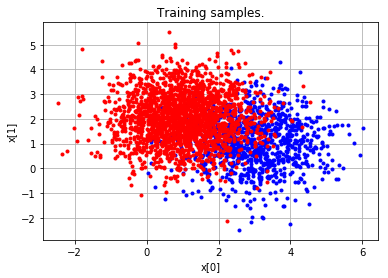

In [3]:
num_x1_samples = 1000 # number of samples from Class 1
num_x2_samples = 2000 # number of samples from Class 2

mu_1 = np.array([[3,1]]).T # Mean of the points in Class 1
mu_2 = np.array([[1,2]]).T # Mean of the points in Class 2

x1 = np.random.randn(num_x1_samples,2) + mu_1.T # Generate num_x1_samples points for Class 1, with mean of mu_1
y1 = np.ones((num_x1_samples,1)) # Assign a label of +1 to the samples from Class 1

x2 = np.random.randn(num_x2_samples,2) + mu_2.T # Generate num_x2_samples points for Class 2, with mean of mu_2
y2 = -1*np.ones((num_x2_samples,1)) # Assign a label of -1 to the samples from Class 2

x_train = np.concatenate((x1,x2),axis=0) # The training data will be a mix of the samples from Class 1 and Class 2. Here we are stacking the rows on top of each other
x_train = np.concatenate((x_train,np.ones((x_train[:,0].size,1))),axis=1) # We add an all ones column to the sample features. This is to account for any constant bias in the samples.
y_train = np.concatenate((y1,y2),axis=0) # Just as the sample points were concatenated, we need to concatenate the labels

#Shuffle training samples. The samples we obtain in practise might be in random order.
perm = np.random.permutation(y_train.size)

x_train = x_train[perm,:]
y_train = y_train[perm,:]


plt.plot(x1[:,0],x1[:,1],'.b')
plt.plot(x2[:,0],x2[:,1],'.r')
plt.grid()
plt.title("Training samples.")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.show()

### Instantiate a linear SVM classifier


LinearSVM parameters from sklearn =  [[ 1.34191139 -0.64872687 -2.12241884]]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


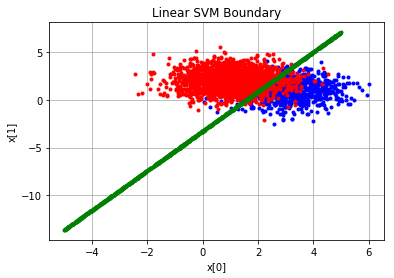

In [4]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5,loss='hinge',C=1)
clf.fit(x_train[:,0:2],y_train[:,0])  

w_sklearn = np.array([np.append(clf.coef_,clf.intercept_)])

print("LinearSVM parameters from sklearn = ", w_sklearn)


x1_plot = 10*np.random.rand(1000,1)-5
x2_plot = -(x1_plot*w_sklearn.T[0,0]+w_sklearn.T[2,0])/w_sklearn.T[1,0]

plt.figure()
plt.plot(x1[:,0],x1[:,1],'.b')
plt.plot(x2[:,0],x2[:,1],'.r')
plt.plot(x1_plot,x2_plot,'.g')
plt.title("Linear SVM Boundary")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.grid()
plt.show()

## Non Linear SVM Classifier

### Download the artificial banana dataset. 

 This is an often used example for non-linear classification. This is a set of artificially generated data points, that are not linearly separable in the current co-ordinate system.

In [5]:
! rm -rf phpwRjVjk
! wget 'https://www.openml.org/data/download/1586217/phpwRjVjk'

--2019-07-16 16:28:00--  https://www.openml.org/data/download/1586217/phpwRjVjk
Resolving www.openml.org (www.openml.org)... 131.155.11.11
Connecting to www.openml.org (www.openml.org)|131.155.11.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75142 (73K) [text/plain]
Saving to: ‘phpwRjVjk’

phpwRjVjk           100%[===================>]  73.38K   264KB/s    in 0.3s    

2019-07-16 16:28:01 (264 KB/s) - ‘phpwRjVjk’ saved [75142/75142]



In [6]:
# Load the dataset as a pandas dataframe
from scipy.io import arff
import pandas as pd

data = arff.loadarff('phpwRjVjk')
df = pd.DataFrame(data[0])
df.head()

,V1,V2,Class
0,1.140,-0.114,b'1'
1,-1.520,-1.150,b'2'
2,-1.050,0.720,b'1'
3,-0.916,0.397,b'2'
4,-1.090,0.437,b'2'


In [7]:
# Reassign the class labels
df['Class'] = df['Class'].replace(to_replace={b'1':1,b'2':2})
df.head()
df.dtypes

V1       float64
V2       float64
Class      int64
dtype: object

,V1,V2,Class
count,5300.000000,5300.000000,5300.000000
mean,0.000016,0.000018,1.448302
std,0.999880,1.000038,0.497367
min,-3.090000,-2.390000,1.000000
25%,-0.753250,-0.914000,1.000000
50%,-0.015250,-0.037200,1.000000
75%,0.782000,0.822500,2.000000
max,2.810000,3.190000,2.000000


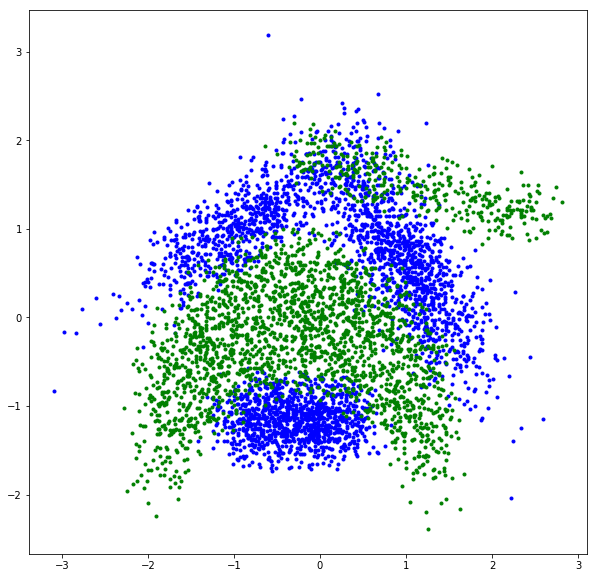

In [8]:
# plot the datapoints
plt.figure(figsize=(10,10))
plt.plot(df['V1'][df['Class']==1],df['V2'][df['Class']==1],'b.')
plt.plot(df['V1'][df['Class']==2],df['V2'][df['Class']==2],'g.')
x_data = df[['V1','V2']].values
y_data = df[['Class']].values
#y_data = y_data*2-3
df.describe()

### Linear SVM

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVM parameters from sklearn =  [[-0.0031397  -0.00362628 -0.00548   ]]


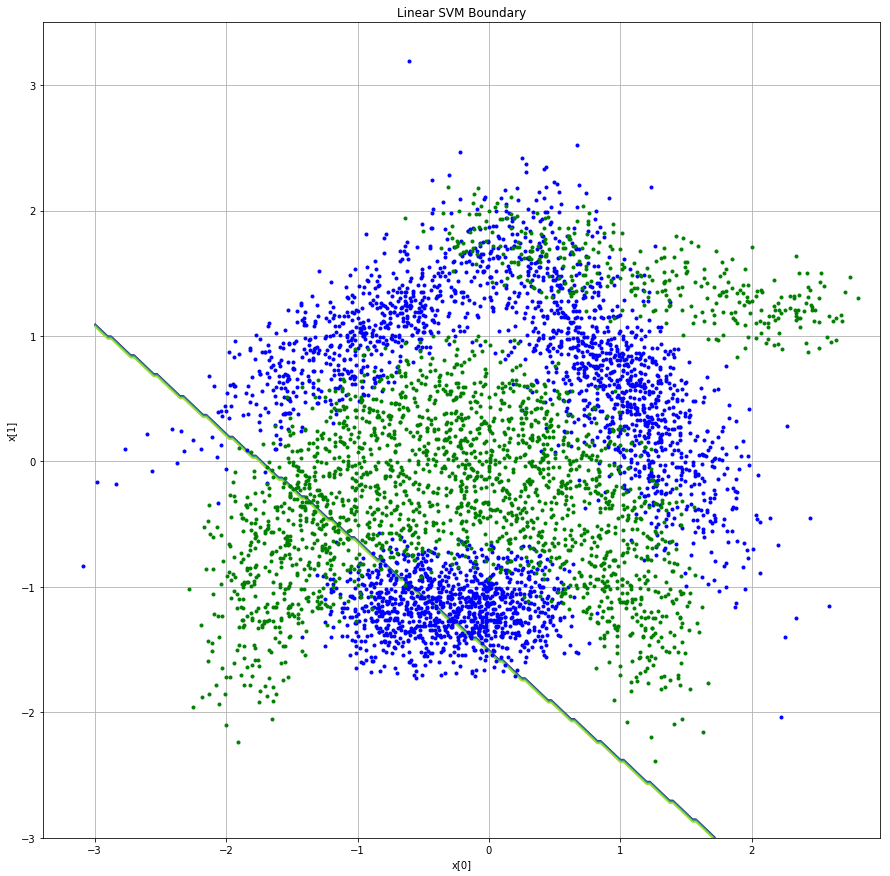

In [9]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5,loss='hinge',C=.00001)
clf.fit(x_data,y_data)  

w_sklearn = np.array([np.append(clf.coef_,clf.intercept_)])

print("LinearSVM parameters from sklearn = ", w_sklearn)


x1_plot = 6*np.random.rand(1000,1)-3
x2_plot = -(x1_plot*w_sklearn.T[0,0]+w_sklearn.T[2,0])/w_sklearn.T[1,0]

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
xx, yy = np.meshgrid(x, y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.reshape(Z,xx.shape)


fig, ax = plt.subplots(figsize=(15,15))
plt.plot(df['V1'][df['Class']==1],df['V2'][df['Class']==1],'b.')
plt.plot(df['V1'][df['Class']==2],df['V2'][df['Class']==2],'g.')
#plt.plot(x1_plot,x2_plot,'.r')
CS = ax.contour(xx, yy, Z)
plt.title("Linear SVM Boundary")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.grid()
plt.show()

### SVM with RBF Kernel

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


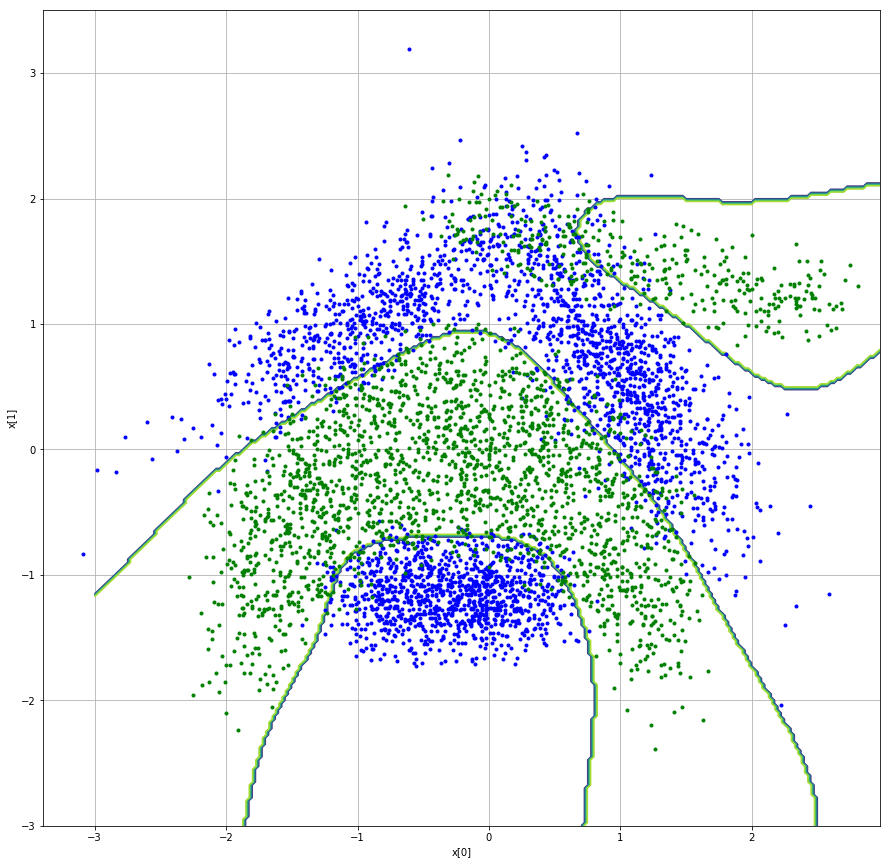

In [10]:
from sklearn.svm import SVC
clf = SVC(C=1000,kernel='rbf')
clf.fit(x_data,y_data[:,0])  


delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
xx, yy = np.meshgrid(x, y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.reshape(Z,xx.shape)

fig, ax = plt.subplots(figsize=(15,15))
plt.plot(df['V1'][df['Class']==1],df['V2'][df['Class']==1],'b.')
plt.plot(df['V1'][df['Class']==2],df['V2'][df['Class']==2],'g.')
#plt.plot(x1_plot[:,0][y_predict==1],x1_plot[:,1][y_predict==1],'.r')
#plt.plot(x1_plot[:,0][y_predict==-1],x1_plot[:,1][y_predict==-1],'.k')
CS = ax.contour(xx, yy, Z)
#plt.title("Linear SVM Boundary")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.grid()
plt.show()

### SVM with Polynomial Kernel

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


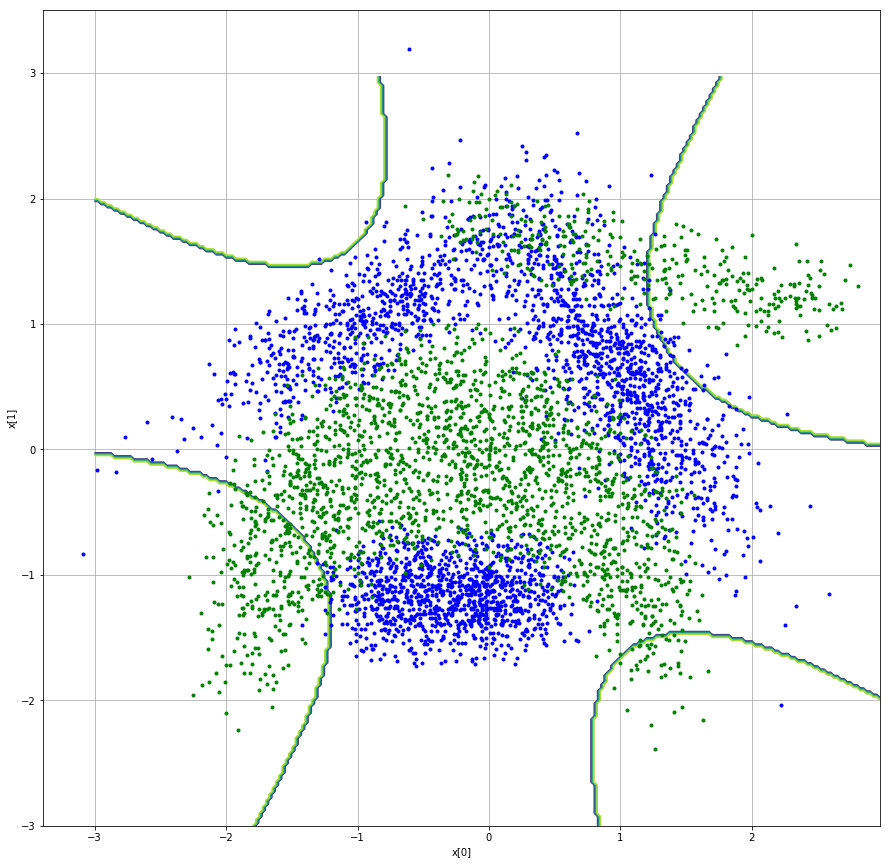

In [12]:
from sklearn.svm import SVC
clf = SVC(C=1,kernel='poly',degree=4)
clf.fit(x_data,y_data[:,0])  


delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
xx, yy = np.meshgrid(x, y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.reshape(Z,xx.shape)

fig, ax = plt.subplots(figsize=(15,15))
plt.plot(df['V1'][df['Class']==1],df['V2'][df['Class']==1],'b.')
plt.plot(df['V1'][df['Class']==2],df['V2'][df['Class']==2],'g.')
#plt.plot(x1_plot[:,0][y_predict==1],x1_plot[:,1][y_predict==1],'.r')
#plt.plot(x1_plot[:,0][y_predict==-1],x1_plot[:,1][y_predict==-1],'.k')
CS = ax.contour(xx, yy, Z)
#plt.title("Linear SVM Boundary")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.grid()
plt.show()